2024-02-16 16:43:50.439122: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-16 16:43:50.439148: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-16 16:43:50.440103: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-16 16:43:50.446528: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-16 16:43:51.324694: W tensorflow/compiler/tf2

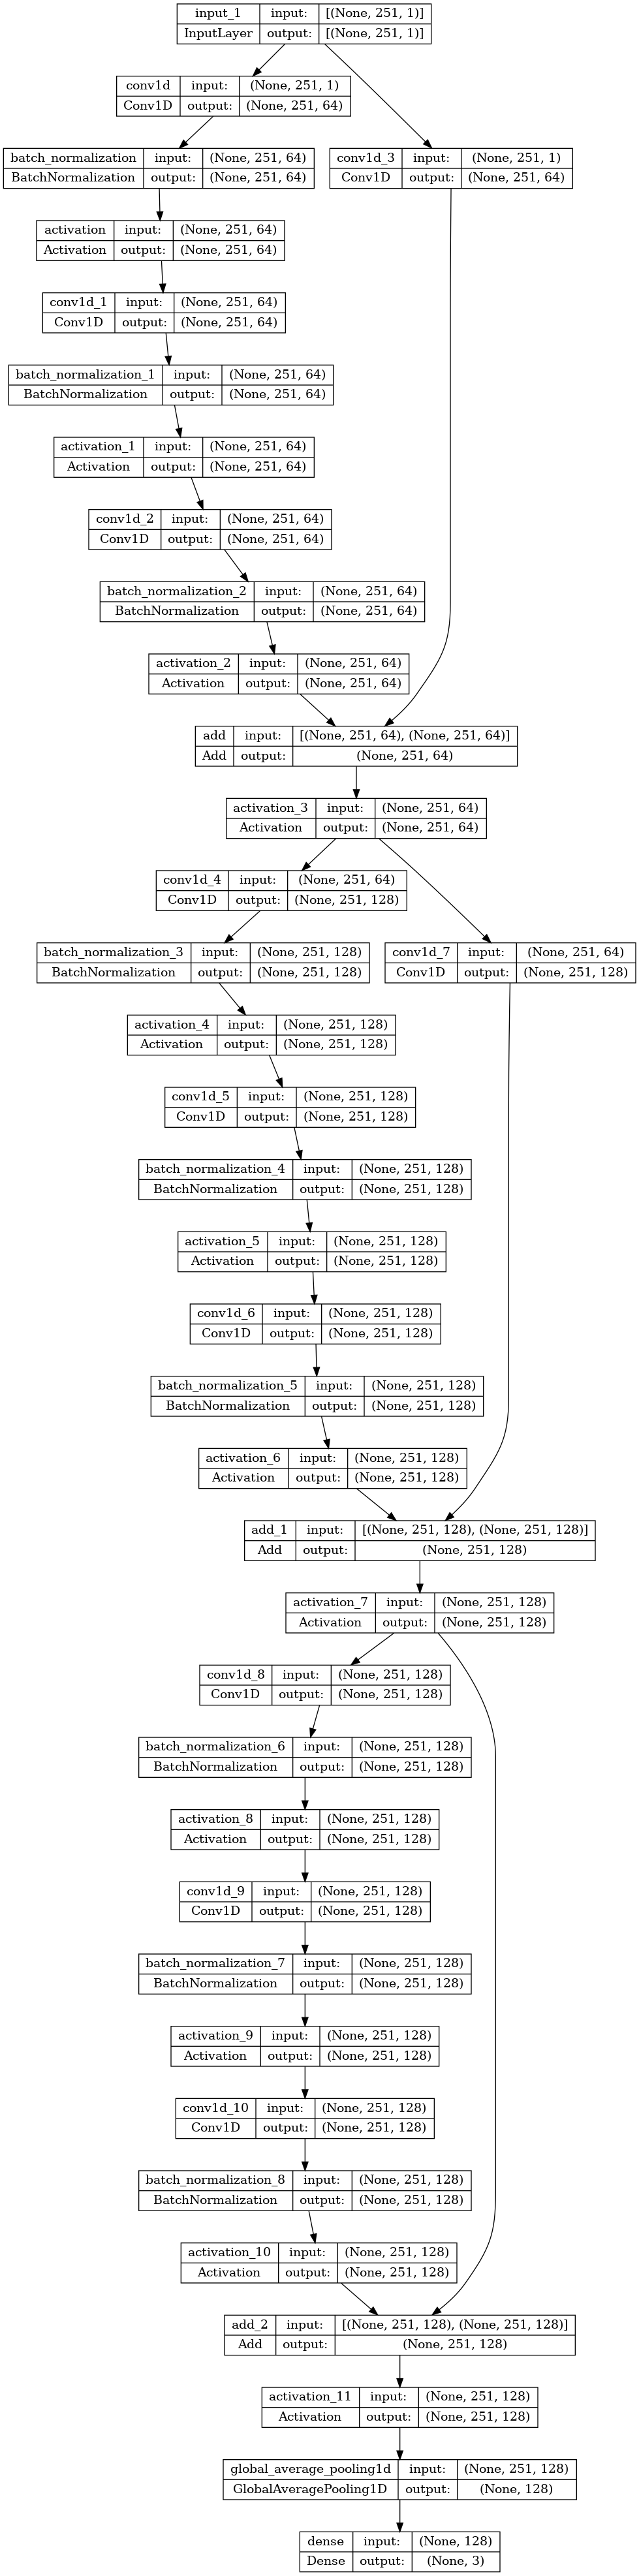

In [1]:
import tensorflow as tf
import pandas as pd

from models.ResNet import ResNet
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

from utils.helper import *
from utils.constants import *

df = read_dataset("ArrowHead")

X_train = df[0].reshape(df[0].shape[0], df[0].shape[1], 1)
X_test = df[2].reshape(df[2].shape[0], df[2].shape[1], 1)
# apply one-hot encoder
y_train=to_categorical(df[1])
y_test=to_categorical(df[3])

model = ResNet(X_train.shape[1:] , y_train.shape[1])
model.compile(optimizer=Adam(learning_rate=0.01), loss=CategoricalCrossentropy(), metrics=['accuracy'])
plot_model(model, show_shapes=True, show_layer_names=True)

In [8]:
results = pd.read_csv("result.csv")
results

,Dataset,Train loss,Train accuracy,Test loss,Test accuracy
0,ArrowHead,0.678126,0.638889,3.620084,0.485714
1,Wine,0.691872,0.526316,0.695424,0.500000
2,OliveOil,1.282252,0.433333,1.299150,0.400000
3,Car,1.151810,0.400000,5.328006,0.333333
4,BeetleFly,0.000000,1.000000,46007.804688,0.850000
5,Yoga,0.689401,0.543333,0.690652,0.535667
6,InlineSkate,1.921015,0.180000,1.924656,0.154545
7,FaceAll,2.639132,0.071429,2.639947,0.039053
8,Ham,0.685378,0.532110,0.693511,0.514286
9,MoteStrain,0.000000,1.000000,1332.437378,0.859425


In [4]:
results = pd.read_csv("result.csv")
results

,Dataset,Train loss,Train accuracy,Test loss,Test accuracy
0,ArrowHead,0.003899,1.000000,7.387911,0.685714
1,Wine,0.691779,0.526316,0.694387,0.500000
2,OliveOil,1.282821,0.433333,1.296988,0.400000
3,Car,0.352149,0.833333,1.172970,0.616667
4,BeetleFly,0.000000,1.000000,1421.919678,0.800000
5,Yoga,0.689453,0.543333,0.690578,0.535667
6,InlineSkate,1.920965,0.180000,4.587185,0.150909
7,FaceAll,2.629645,0.075000,2.915818,0.082249
8,Ham,0.000000,1.000000,8.105940,0.733333
9,MoteStrain,0.000000,1.000000,2.603525,0.861022


In [6]:
results_uea=pd.read_csv("results-uea-avg-std.csv")
results_uea

,Unnamed: 0,MLP,FCN,ResNet,Encoder,MCNN,t-LeNet,MCDCNN,Time-CNN,TWIESN
0,50words,68.4(7.1),62.7(6.1),74.0(1.5),72.3(1.0),22.0(24.3),12.5(0.0),58.9(5.3),62.1(1.0),49.6(2.6)
1,Adiac,39.7(1.9),84.4(0.7),82.9(0.6),48.4(2.5),2.2(0.6),2.0(0.0),61.0(8.7),37.9(2.0),41.6(4.5)
2,ArrowHead,77.8(1.2),84.3(1.5),84.5(1.2),80.4(2.9),33.9(4.7),30.3(0.0),68.5(6.7),72.3(2.6),65.9(9.4)
3,Beef,72.0(2.8),69.7(4.0),75.3(4.2),64.3(5.0),20.0(0.0),20.0(0.0),56.3(7.8),76.3(1.1),53.7(14.9)
4,BeetleFly,87.0(2.6),86.0(9.7),85.0(2.4),74.5(7.6),50.0(0.0),50.0(0.0),58.0(9.2),89.0(3.2),73.0(7.9)
...,...,...,...,...,...,...,...,...,...,...
82,uWaveGestureLibrary_Z,69.7(0.2),72.6(0.5),75.0(0.4),71.1(0.5),18.0(18.4),12.1(0.0),65.0(1.8),64.2(0.9),56.5(2.0)
83,wafer,99.6(0.0),99.7(0.0),99.9(0.1),99.6(0.0),91.3(4.4),89.2(0.0),99.2(0.3),96.1(0.1),91.4(0.5)
84,yoga,85.5(0.4),83.9(0.7),87.0(0.9),82.0(0.6),53.6(0.0),53.6(0.0),76.2(3.9),78.1(0.7),60.7(1.9)
85,Average_Rank,4.611765,2.682353,1.994118,3.682353,8.017647,8.417647,5.376471,4.970588,5.247059


In [9]:
df = pd.read_csv("results-uea-avg-std.csv")

# remove std
def remove_parenthesis(value):
    return float(value.split("(")[0])

def convert_to_percent(value):
    return float("%.2f" % float(value*100))

df.iloc[:, 1:] = df.iloc[:, 1:].map(remove_parenthesis)
results["Train accuracy"]=results["Train accuracy"].apply(convert_to_percent)
results["Test accuracy"]=results["Test accuracy"].apply(convert_to_percent)

df['Unnamed: 0'] = df['Unnamed: 0'].str.lower()
dataset_names = pd.Series(UNIVARIATE_DATASET_NAMES_2018, name="Unnamed: 0").str.lower()
df_copy = df.merge(dataset_names, on='Unnamed: 0', how='right')
df_copy.dropna(axis=0, inplace=True)

results['Unnamed: 0'] = results['Dataset'].str.lower()

# merge and remove unused columns
result = results.merge(df_copy[["Unnamed: 0","MLP"]],on="Unnamed: 0",how="right").drop("Unnamed: 0",axis=1)
result

,Dataset,Train loss,Train accuracy,Test loss,Test accuracy,MLP
0,ArrowHead,1.369213e-05,100.00,5.680031,73.71,77.8
1,Wine,6.917889e-01,52.63,0.694254,50.00,56.5
2,OliveOil,1.282214e+00,43.33,1.298481,40.00,66.7
3,Car,1.869125e-01,93.33,1.410494,63.33,76.7
4,BeetleFly,0.000000e+00,100.00,4.377611,80.00,87.0
5,Yoga,6.893885e-01,54.33,0.690694,53.57,85.5
6,InlineSkate,1.742696e+00,26.00,3.922623,20.36,33.7
7,FaceAll,2.610312e+00,8.21,2.632383,4.02,79.3
8,Ham,1.421762e-08,100.00,7.896139,64.76,69.1
9,MoteStrain,0.000000e+00,100.00,3.974996,81.23,85.8


In [11]:
plot_1v1_perf(result,"MLP","Test accuracy")